### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [3]:
df= pd.read_csv(r"C:\Users\udayk\Downloads\car_df_EDA.csv")

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450


### Data cleaning

In [5]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

### Duplicated values

In [7]:
df.duplicated().sum()

3

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

### structural errors

In [10]:
for i in df.columns:
    print(f"{i} = {df[i].unique()}")
    print()

make = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel_type = ['gas' 'diesel']

aspiration = ['std' 'turbo']

num_of_doors = ['two' 'four' '?']

body_style = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive_wheels = ['rwd' 'fwd' '4wd']

engine_location = ['front' 'rear']

wheel_base = [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2   nan 103.5 110.   88.4  93.7
 103.3  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9
 106.7 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3
  99.2 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7
 102.4 102.9 104.5  97.3 104.3 109.1]

length = [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  17

In [11]:
df["num_of_doors"]= df["num_of_doors"].replace("?",np.nan)

In [12]:
def doors(n):
    if n== "two":
        return 2
    elif n== "four":
        return 4
    else:
        return np.nan

In [13]:
df["num_of_doors"]=df["num_of_doors"].apply(doors)

In [14]:
df["num_of_doors"].unique()

array([ 2.,  4., nan])

In [15]:
df["num_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
def cylinders(n):
    if n== "two":
        return 2
    elif n== "three":
        return 3
    elif n== "four":
        return 4
    elif n== "five":
        return 5
    elif n== "six":
        return 6
    elif n== "eight":
        return 8
    else:
        return 12

In [17]:
df["num_of_cylinders"]= df["num_of_cylinders"].apply(cylinders)

In [18]:
df["num_of_cylinders"].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [19]:
df['horsepower'].replace("?",np.nan,inplace=True)

df['peak_rpm'].replace("?",np.nan,inplace=True)

df['price'].replace("?",np.nan,inplace=True)

### Missing Values

In [20]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [21]:
df["num_of_doors"].fillna(df["num_of_doors"].median(),inplace=True)

df["wheel_base"].fillna(df["wheel_base"].median(),inplace=True)

df["engine_type"].fillna(df["engine_type"].mode()[0],inplace=True)

df["engine_size"].fillna(df["engine_size"].median(),inplace=True)

df["horsepower"].fillna(df["horsepower"].median(),inplace=True)

df["peak_rpm"].fillna(df["peak_rpm"].median(),inplace=True)

df["price"].fillna(df["price"].median(),inplace=True)

In [22]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [23]:
df.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,dohc,4,130.0,mpfi,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,dohc,4,130.0,mpfi,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,6,152.0,mpfi,9.0,154,5000,19,26,16500
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,ohc,4,109.0,mpfi,10.0,102,5500,24,30,13950
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,ohc,5,136.0,mpfi,8.0,115,5500,18,22,17450


### Type Casting

In [24]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [25]:
df["price"]=  df["price"].astype("float64")
df["horsepower"]= df["horsepower"].astype("float64")
df["peak_rpm"]= df["peak_rpm"].astype("float64")

In [26]:
num= df.select_dtypes(exclude= "object")
num.columns

Index(['num_of_doors', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'num_of_cylinders', 'engine_size', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [27]:
obj= df.select_dtypes(include= "object")
obj.columns

Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')

### Univariate Analysis For Numerical Columns

**For num_of_doors**

<Axes: title={'center': 'Histogram of Number of Doors'}, xlabel='Number of Doors', ylabel='Frequency'>

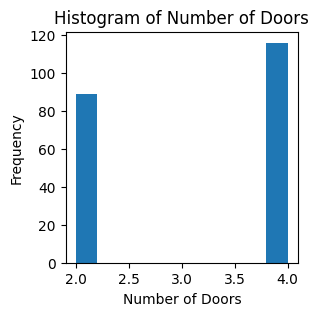

In [28]:
df['num_of_doors'].plot(kind= "hist",title= "Histogram of Number of Doors",xlabel="Number of Doors",figsize=(3,3))

conclusion :

1. we have the maximum number of cars with 4 doors are 116.
2. we have 89 cars available with  2 doors.
3. Histogram takes y-label as frequency/occurences of data.

<Axes: title={'center': 'Boxplot of Number of Doors'}>

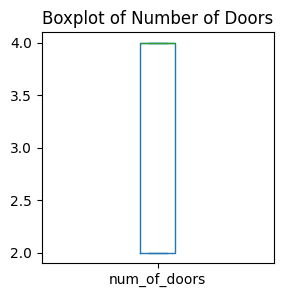

In [29]:
df['num_of_doors'].plot(kind= "box",title= "Boxplot of Number of Doors",figsize=(3,3))

conclusion:
    
1. The boxplot is used to find the outliers in the data.
2. As per boxplot the minimum value is 2 and the maximum  value is 4.
3. So there is no outliers in this data.
4. Another use of boxplot is to find the distribution of the data.

<Axes: title={'center': 'Density of Number of Doors'}, ylabel='Density'>

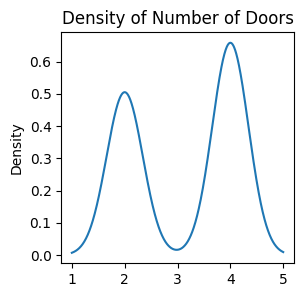

In [30]:
df['num_of_doors'].plot(kind= "kde",title= "Density of Number of Doors",xlabel="Number of Doors",figsize=(3,3))

conclusion:

1. If density curve/kde(kernel density estimation)curve is a bell shaped curve then the data is following normal distribution,otherwise it is following standardisation.
2. Density plot can be used to find the distribution based on probability density(between 0 and 1)
3. As per density plot the above curve is  bell shaped curve, so the data is  normally distributed.

**For wheel_base**

<Axes: title={'center': 'Histogram of wheel_base'}, xlabel='wheel_base', ylabel='Frequency'>

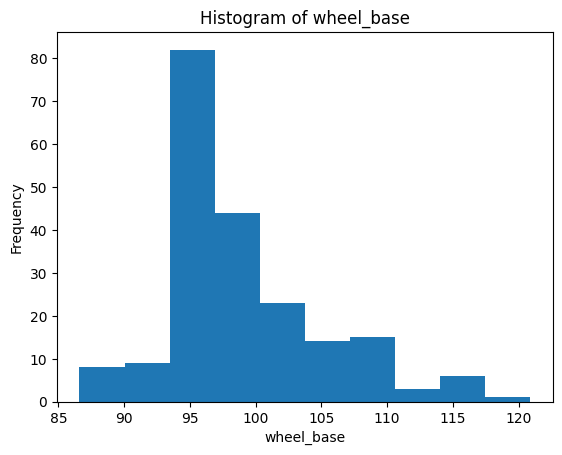

In [31]:
df['wheel_base'].plot(kind= "hist",title= "Histogram of wheel_base",xlabel="wheel_base")

conclusion:

1. The minimum value of wheel base is 87
2. The maximum value of wheel base is 121
3. 80 cars are having the wheel base from 94 to 98

<Axes: title={'center': 'Boxplot of wheel_base'}>

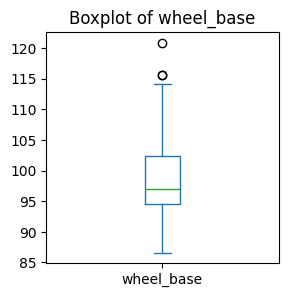

In [32]:
df['wheel_base'].plot(kind= "box",title= "Boxplot of wheel_base",figsize=(3,3))

conclusion:

1. As per boxplot, the minimum value is 87 and the maximum 121
2. As there are two outliers, we have to keep them as it is because this data is real data.

<Axes: title={'center': 'Density of wheel_base'}, ylabel='Density'>

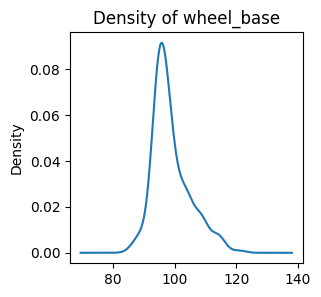

In [33]:
df['wheel_base'].plot(kind= "kde",title= "Density of wheel_base",xlabel="wheel_base",figsize=(3,3))

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For Length**

<Axes: title={'center': 'Histogram of length'}, xlabel='length', ylabel='Frequency'>

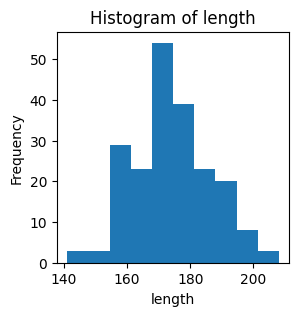

In [34]:
df['length'].plot(kind= "hist",title= "Histogram of length",xlabel="length",figsize=(3,3))

conclusion:
1. The minimum length is 141
2. The maximum length is 208
3. around 55 cars are having the length from 170-180.

<Axes: title={'center': 'Boxplot of length'}>

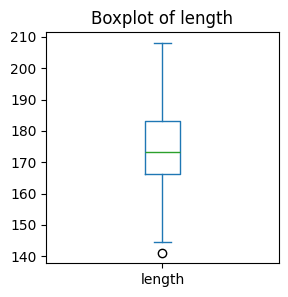

In [35]:
df['length'].plot(kind= "box",title= "Boxplot of length",figsize=(3,3))

conclusion:

1. As per boxplot, the minimum value is 141 and the maximum 208
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of length'}, ylabel='Density'>

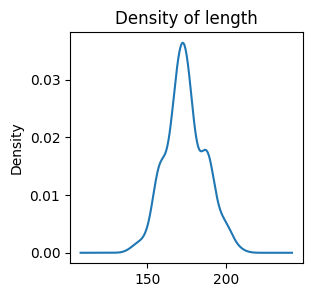

In [36]:
df['length'].plot(kind= "kde",title= "Density of length",xlabel="legth",figsize=(3,3))

In [37]:
df['length'].mean(),df['length'].median()

(174.04926829268288, 173.2)

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For Width**

<Axes: title={'center': 'Histogram of width'}, xlabel='width', ylabel='Frequency'>

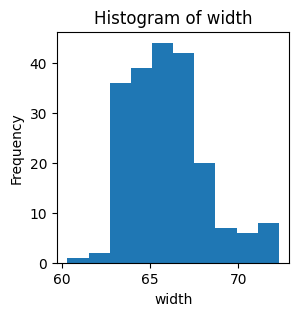

In [38]:
df['width'].plot(kind= "hist",title= "Histogram of width",xlabel="width",figsize=(3,3))

conclusion:

1. The minimum width is 61
2. The maximum width is 73
3. around 45 cars are having the width 68.

<Axes: title={'center': 'Boxplot of width'}>

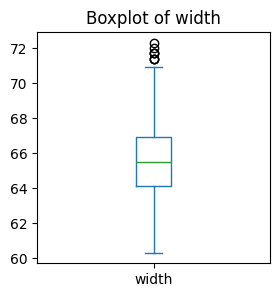

In [39]:
df['width'].plot(kind= "box",title= "Boxplot of width",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 61 and the maximum 73
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of width'}, ylabel='Density'>

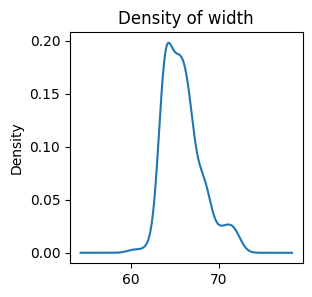

In [40]:
df['width'].plot(kind= "kde",title= "Density of width",xlabel="width",figsize=(3,3))

In [41]:
df['width'].mean(),df['width'].median()

(65.90780487804878, 65.5)

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For height**

<Axes: title={'center': 'Histogram of height'}, xlabel='height', ylabel='Frequency'>

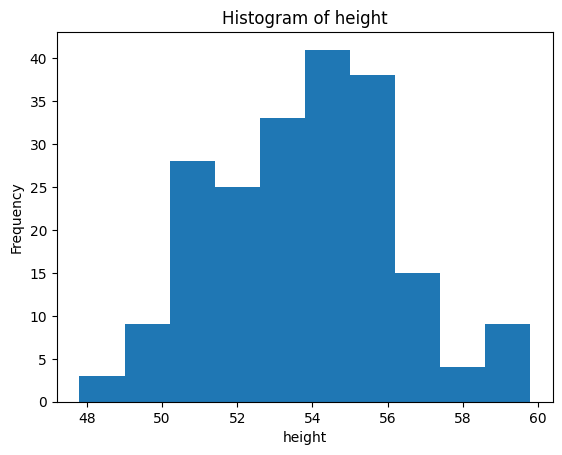

In [42]:
df['height'].plot(kind= "hist",title= "Histogram of height",xlabel="height",)

conclusion:
1. The minimum width is 47
2. The maximum width is 59
3. 40 cars are having the height 54.

<Axes: title={'center': 'Boxplot of height'}>

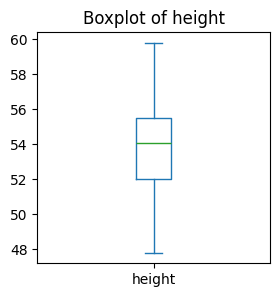

In [43]:
df['height'].plot(kind= "box",title= "Boxplot of height",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 47 and the maximum 59
2. There is no outliers in height.
3. The data follows the Normal distribution as the whiskers are in same length and the Q2 line is exactly in the middle.

<Axes: title={'center': 'Density of height'}, ylabel='Density'>

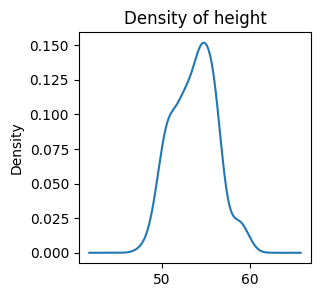

In [44]:
df['height'].plot(kind= "kde",title= "Density of height",xlabel="height",figsize=(3,3))

In [45]:
df['width'].mean(),df['width'].median()

(65.90780487804878, 65.5)

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For curb_weight**

<Axes: title={'center': 'Histogram of curb_weight'}, xlabel='curb_weight', ylabel='Frequency'>

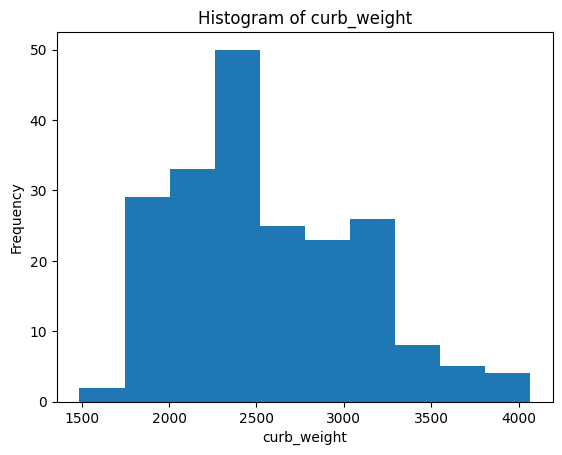

In [46]:
df['curb_weight'].plot(kind= "hist",title= "Histogram of curb_weight",xlabel="curb_weight",)

conclusion:
1. The minimum curb_weight is 1500
2. The maximum curb_weight is 4000
3. 50 cars are having the curb_weight 2500.

<Axes: title={'center': 'Boxplot of curb_weight'}>

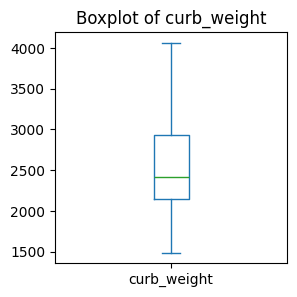

In [47]:
df['curb_weight'].plot(kind= "box",title= "Boxplot of curb_weight",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 1500 and the maximum 4000
2. There is no outliers in curb_weight.

<Axes: title={'center': 'Density of curb_weight'}, ylabel='Density'>

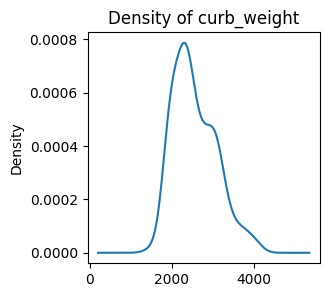

In [48]:
df['curb_weight'].plot(kind= "kde",title= "Density of curb_weight",xlabel="curb_weight",figsize=(3,3))

conclusion:
1. The mean and median values are not closed values.
2. From the above curve, curve is not in  bell shape so the data is not normally distributed.

**For num_of_cylinders**

<Axes: title={'center': 'Histogram of num_of_cylinders'}, xlabel='num_of_cylinders', ylabel='Frequency'>

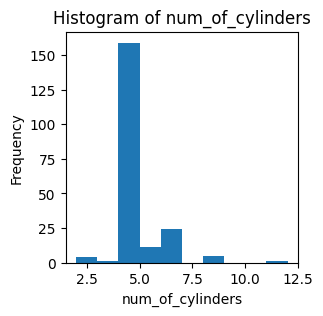

In [49]:
df['num_of_cylinders'].plot(kind= "hist",title= "Histogram of num_of_cylinders",xlabel="num_of_cylinders",figsize=(3,3))

conclusion:
1. The minimum num_of_cylinders is 2.0
2. The maximum num_of_cylinders is 12.0
3. 160 cars are having the num_of_cylinders 4.0.

<Axes: title={'center': 'Boxplot of num_of_cylinders'}>

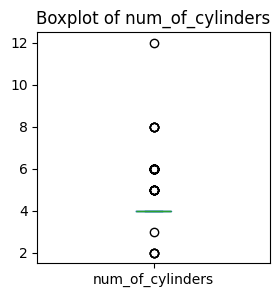

In [50]:
df['num_of_cylinders'].plot(kind= "box",title= "Boxplot of num_of_cylinders",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 2 and the maximum 12
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of num_of_cylinders'}, ylabel='Density'>

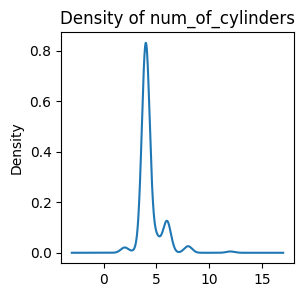

In [51]:
df['num_of_cylinders'].plot(kind= "kde",title= "Density of num_of_cylinders",xlabel="num_of_cylinders",figsize=(3,3))

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For engine_size**

<Axes: title={'center': 'Histogram of engine_size'}, xlabel='engine_size', ylabel='Frequency'>

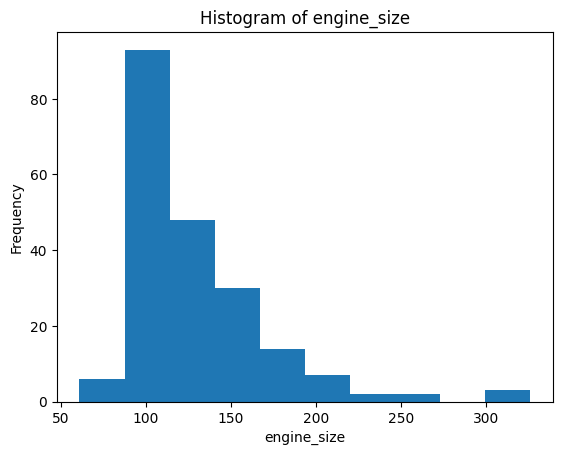

In [52]:
df['engine_size'].plot(kind= "hist",title= "Histogram of engine_size",xlabel="engine_size",)

conclusion:
1. The minimum engine_size is 60
2. The maximum engine_size is 320
3. 90 cars are having the engine_size 80-100.

<Axes: title={'center': 'Boxplot of engine_size'}>

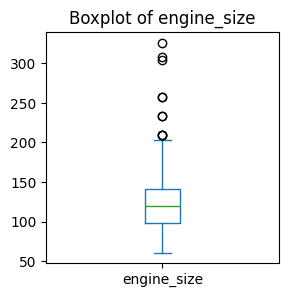

In [53]:
df['engine_size'].plot(kind= "box",title= "Boxplot of engine_size",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 60 and the maximum 320
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of engine_size'}, ylabel='Density'>

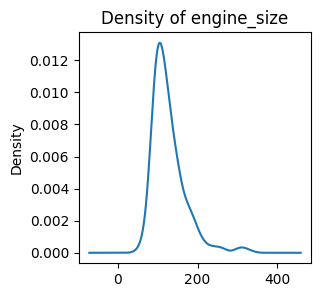

In [54]:
df['engine_size'].plot(kind= "kde",title= "Density of engine_size",xlabel="engine_size",figsize=(3,3))

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For compression_ratio**

<Axes: title={'center': 'Histogram of compression_ratio'}, xlabel='compression_ratio', ylabel='Frequency'>

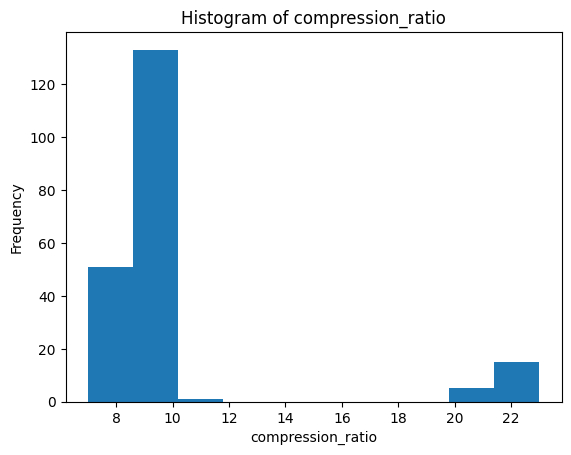

In [55]:
df['compression_ratio'].plot(kind= "hist",title= "Histogram of compression_ratio",xlabel="compression_ratio",)

conclusion:
1. The minimum compression_ratio is 6
2. The maximum compression_ratio is 23
3. 130 cars are having the compression_ratio of 9-10.

<Axes: title={'center': 'Boxplot of compression_ratio'}>

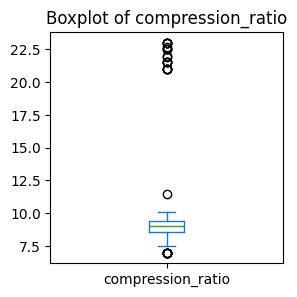

In [56]:
df['compression_ratio'].plot(kind= "box",title= "Boxplot of compression_ratio",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 6 and the maximum 23
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of compression_ratio'}, ylabel='Density'>

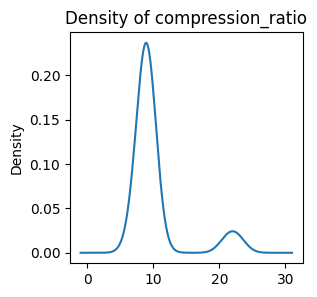

In [57]:
df['compression_ratio'].plot(kind= "kde",title= "Density of compression_ratio",xlabel="compression_ratio",figsize=(3,3))

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For horsepower**

<Axes: title={'center': 'Histogram of horsepower'}, xlabel='horsepower', ylabel='Frequency'>

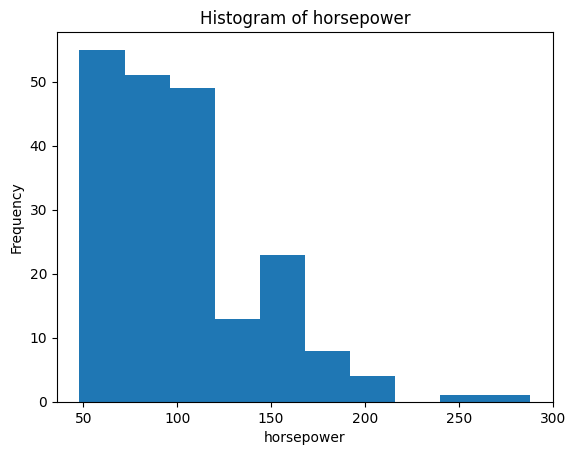

In [58]:
df['horsepower'].plot(kind= "hist",title= "Histogram of horsepower",xlabel="horsepower")

conclusion:
1. The minimum horsepower is 50
2. The maximum horsepower is 280
3. 55 cars are having the horsepower 50.

<Axes: title={'center': 'Boxplot of horsepower'}>

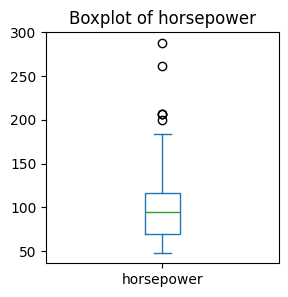

In [59]:
df['horsepower'].plot(kind= "box",title= "Boxplot of horsepower",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 50 and the maximum 280
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of horsepower'}, ylabel='Density'>

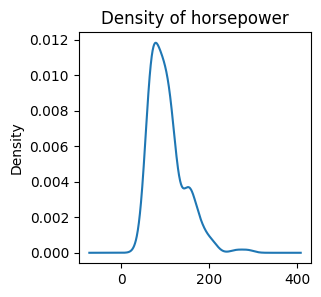

In [60]:
df['horsepower'].plot(kind= "kde",title= "Density of horsepower",xlabel="horsepower",figsize=(3,3))

conclusion:
* From the above curve, curve is  in  bell shape, so the data is normally distributed.

**For peak_rpm**

<Axes: title={'center': 'Histogram of peak_rpm'}, xlabel='peak_rpm', ylabel='Frequency'>

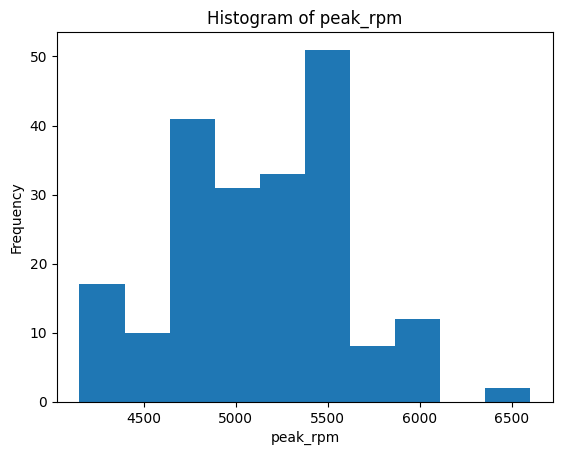

In [61]:
df['peak_rpm'].plot(kind= "hist",title= "Histogram of peak_rpm",xlabel="peak_rpm")

conclusion:
1. The minimum peak_rpm is 4000
2. The maximum peak_rpm is 6500
3. 50 cars are having the peak_rpm 5500.

<Axes: title={'center': 'Boxplot of peak_rpm'}>

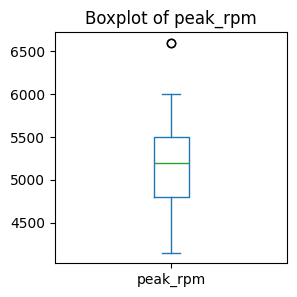

In [62]:
df['peak_rpm'].plot(kind= "box",title= "Boxplot of peak_rpm",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 4000 and the maximum 6500.
2. As there is an outlier,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of peak_rpm'}, ylabel='Density'>

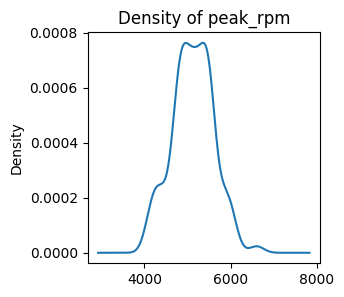

In [63]:
df['peak_rpm'].plot(kind= "kde",title= "Density of peak_rpm",xlabel="peak_rpm",figsize=(3,3))

conclusion:
1. The mean and median values are not closed values.
2. From the above curve, curve is not in  bell shape so the data is not normally distributed.

**For city_mpg**

<Axes: title={'center': 'Histogram of city_mpg'}, xlabel='city_mpg', ylabel='Frequency'>

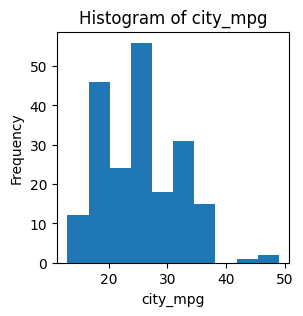

In [64]:
df['city_mpg'].plot(kind= "hist",title= "Histogram of city_mpg",xlabel="city_mpg",figsize=(3,3))

conclusion:
1. The minimum city_mpg is 10
2. The maximum city_mpg is 48
3. 55 cars are having the city_mpg  25.

<Axes: title={'center': 'Boxplot of city_mpg'}>

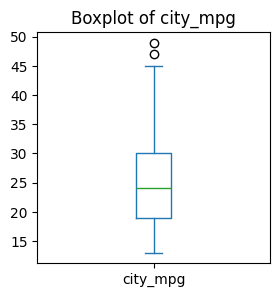

In [65]:
df['city_mpg'].plot(kind= "box",title= "Boxplot of city_mpg",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 10 and the maximum value is 48
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of city_mpg'}, ylabel='Density'>

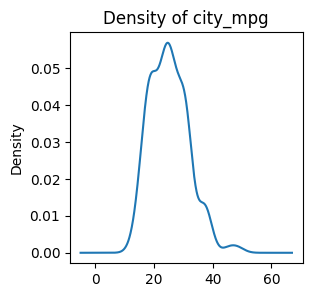

In [66]:
df['city_mpg'].plot(kind= "kde",title= "Density of city_mpg",xlabel="city_mpg",figsize=(3,3))

conclusion:
* From the above curve, curve is  in  bell shape so the data is  normally distributed.

**For highway_mpg**

<Axes: title={'center': 'Histogram of highway_mpg'}, xlabel='highway_mpg', ylabel='Frequency'>

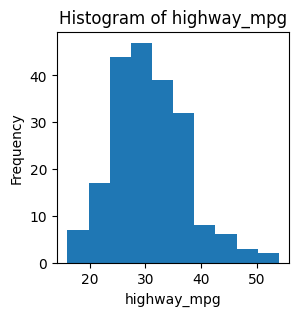

In [67]:
df['highway_mpg'].plot(kind= "hist",title= "Histogram of highway_mpg",xlabel="highway_mpg",figsize=(3,3))

conclusion:
1. The minimum highway_mpg is 16
2. The maximum highway_mpg is 54
3. 75 cars are having the  highway_mpg 25-38.

<Axes: title={'center': 'Boxplot of highway_mpg'}>

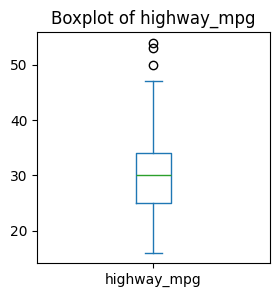

In [68]:
df['highway_mpg'].plot(kind= "box",title= "Boxplot of highway_mpg",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 16 and the maximum 54
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of highway_mpg'}, ylabel='Density'>

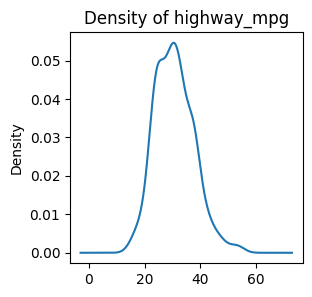

In [69]:
df['highway_mpg'].plot(kind= "kde",title= "Density of highway_mpg",xlabel="highway_mpg",figsize=(3,3))

conclusion:
* From the above curve, curve is in bell shape so the data is normally distributed.

**For price**

<Axes: title={'center': 'Histogram of price'}, xlabel='price', ylabel='Frequency'>

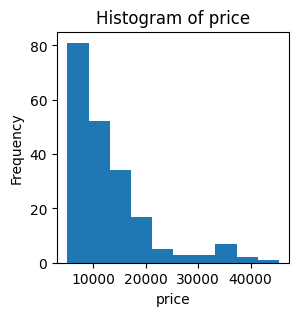

In [70]:
df['price'].plot(kind= "hist",title= "Histogram of price",xlabel="price",figsize=(3,3))

conclusion:
1. The minimum price is 5000
2. The maximum price is 45000
3. 80 cars are having the price 5000.

<Axes: title={'center': 'Boxplot of price'}>

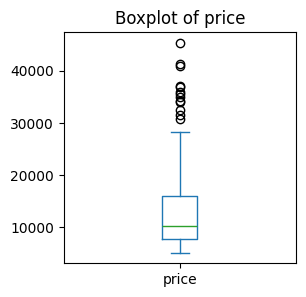

In [71]:
df['price'].plot(kind= "box",title= "Boxplot of price",figsize=(3,3))

conclusion:
1. As per boxplot, the minimum value is 5000 and the maximum value 45000
2. As there are outliers,but we have to keep them as it is because this data is crucial for the data analysis/real data.

<Axes: title={'center': 'Density of price'}, ylabel='Density'>

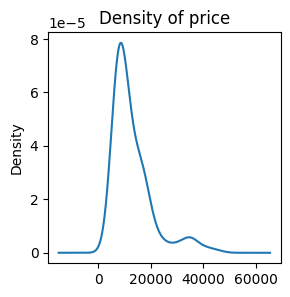

In [72]:
df['price'].plot(kind= "kde",title= "Density of price",xlabel="price",figsize=(3,3))

conclusion:
1. The mean and median values are not closed values.
2. From the above curve, curve is not in  bell shape so the data is not normally distributed.
3. or the data is partially normally distributed.

### Univariate anlysis for Categorical Features

In [73]:
obj.columns

Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')

**For make**

<Axes: xlabel='make'>

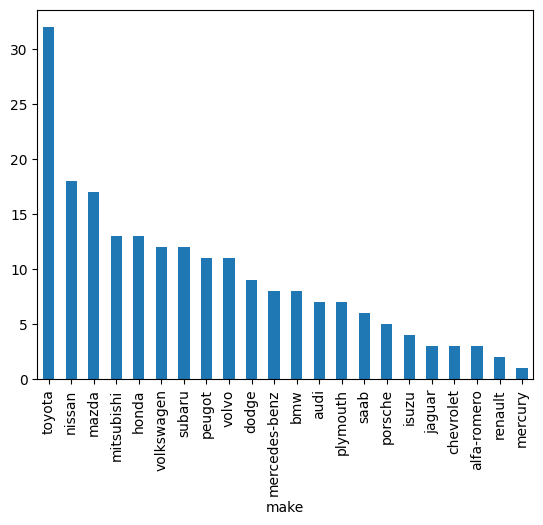

In [76]:
df["make"].value_counts().plot(kind= "bar")

conclusion:
1. from the dataset,we have the maximum of 32 toyota cars.
2. Minimum of less than 3 of renault and mercury cars.

<Axes: xlabel='make', ylabel='count'>

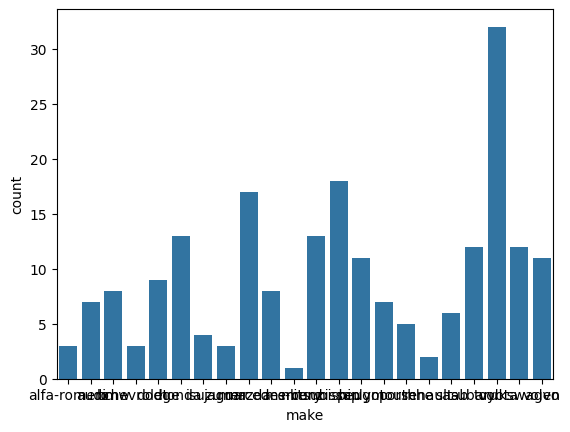

In [79]:
sns.countplot(data=df,x="make")

**For Fuel_type**

<Axes: xlabel='fuel_type'>

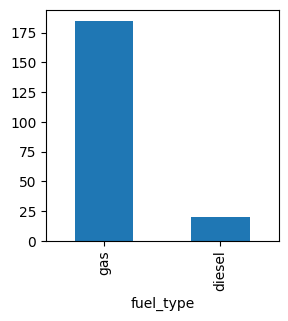

In [83]:
df["fuel_type"].value_counts().plot(kind= "bar",figsize=(3,3))

conclusion:
1. From the bar plot, There are 2 fueltypes-gas and desiel. 
2. Maximum cars are run with gas fueltype.
3. Minimum cars are run with diesel.

<Axes: xlabel='fuel_type', ylabel='count'>

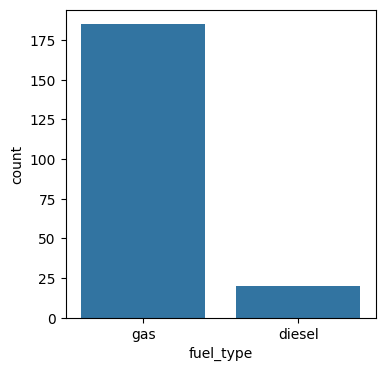

In [94]:
plt.figure(figsize = (4,4))
sns.countplot(data=df,x="fuel_type")

<Axes: ylabel='count'>

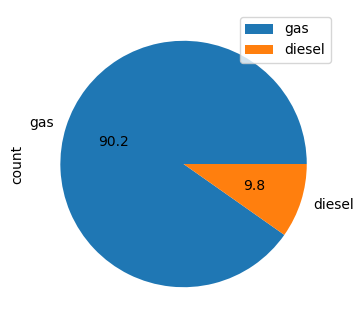

In [98]:
((df["fuel_type"].value_counts()/len(df["fuel_type"]))*100).plot(kind="pie",legend= True,autopct="%1.1f",figsize=(4,4))

conclusion:
1. As from the above piechart, 90.2 percent of the cars are run with gas.
2. 9.8 percent of cars are run with deisel from the dataset.

**For Aspiration**

<Axes: xlabel='aspiration'>

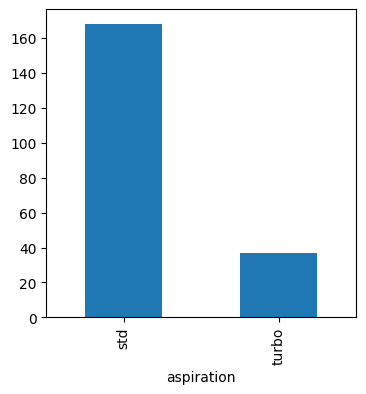

In [95]:
df["aspiration"].value_counts().plot(kind="bar",figsize=(4,4))

conclusion:
1. From the bar plot, There are 2 aspiration types-std and turbo. 
2. Maximum cars are with aspiration is std.
3. Minimum cars are with aspiration is turbo.

<Axes: xlabel='aspiration', ylabel='count'>

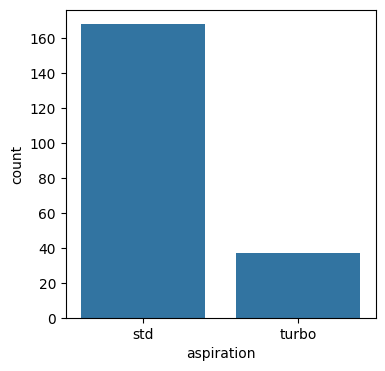

In [107]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="aspiration")

<Axes: ylabel='count'>

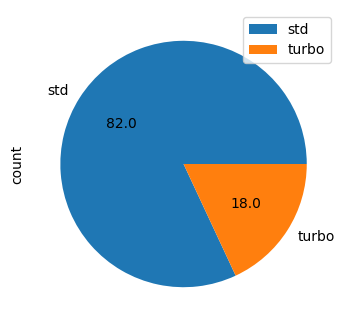

In [108]:
((df["aspiration"].value_counts()/len(df["aspiration"]))*100).plot(kind="pie",legend= True,autopct="%1.1f",figsize=(4,4))

conclusion:
1. As from the above piechart,82.0 percent of the cars are having the aspiration as std as per the dataset.
2. 18.0 percent of cars are having the aspiration as turbo.

**For body_style**

<Axes: xlabel='body_style'>

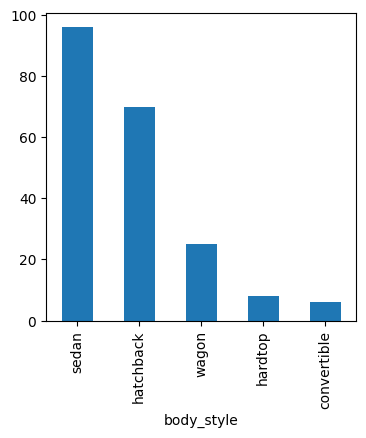

In [110]:
df["body_style"].value_counts().plot(kind= "bar",figsize=(4,4))

conclusion:
1. From the bar plot, There are 5 body style types- sedan,hatchback,wagon,hardtop,convertible. 
2. Maximum cars are with bodystyle is sedan.
3. The second most number of cars are having the body style hatchback.
4. Minimum cars are with body style is convertible.

<Axes: xlabel='body_style', ylabel='count'>

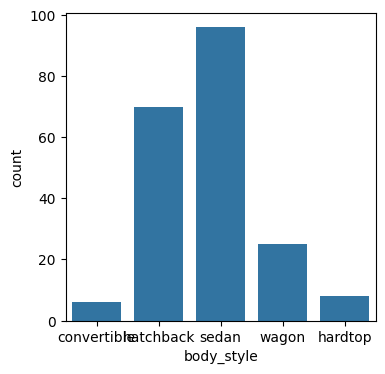

In [111]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="body_style")

<Axes: ylabel='count'>

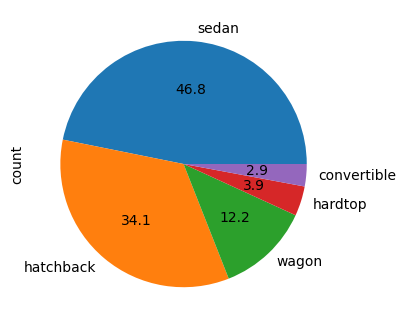

In [114]:
((df["body_style"].value_counts()/len(df["body_style"]))*100).plot(kind="pie",autopct="%1.1f",figsize=(4,4))

conclusion:
1. Maximum cars are with bodystyle is sedan of percentage is 46.8.
2. The second most number of cars are having the body style hatchback of percentage is 34.1.
3. Minimum cars are with body style is convertible and the percentage is 2.9.

**For drive_wheels**

<Axes: xlabel='drive_wheels'>

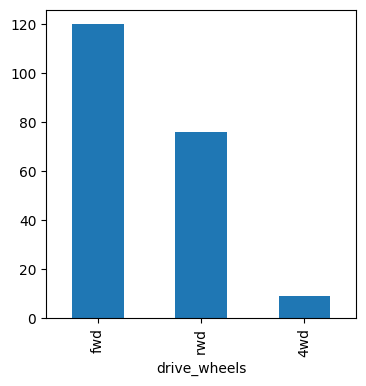

In [116]:
df["drive_wheels"].value_counts().plot(kind= "bar",figsize=(4,4))

conclusion:
1. From the bar plot, There are 3 types of drive wheels- fwd,rwd,4wd. 
2. Maximum number of cars are with drive wheels is fwd.
3. The second most number of cars are having the dive wheels rwd.
4. Minimum number of cars are with 4wd.

<Axes: xlabel='drive_wheels', ylabel='count'>

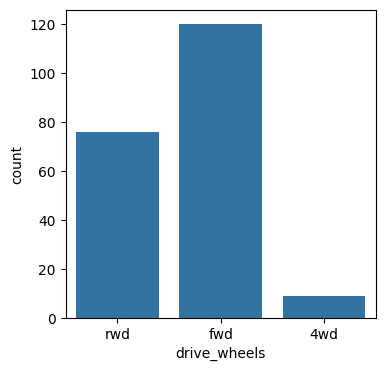

In [118]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="drive_wheels")

<Axes: ylabel='count'>

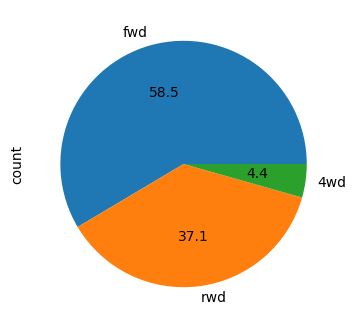

In [120]:
((df["drive_wheels"].value_counts()/len(df["drive_wheels"]))*100).plot(kind="pie",autopct="%1.1f",figsize=(4,4))

conclusion:
1. Maximum number of cars are with drive wheels is fwd and the percentage is 58.5.
2. Minimum number of cars are with 4wd and the percentage is 4.4.

**For engine_location**

<Axes: xlabel='engine_location'>

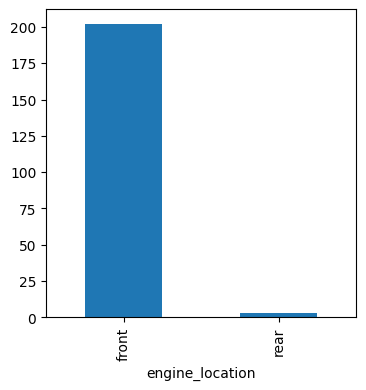

In [122]:
df["engine_location"].value_counts().plot(kind= "bar",figsize=(4,4))

conclusion:
1. From the bar plot, There are 2 types of engine location- front,rear. 
2. Maximum number of cars are with engine location is front.
3. Minimum number of cars are with rear.

<Axes: xlabel='engine_location', ylabel='count'>

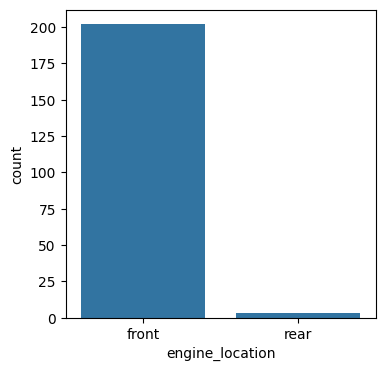

In [123]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="engine_location")

<Axes: ylabel='count'>

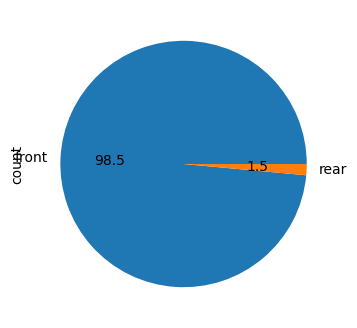

In [124]:
((df["engine_location"].value_counts()/len(df["engine_location"]))*100).plot(kind="pie",autopct="%1.1f",figsize=(4,4))

conclusion:
1. Maximum number of cars are with engine location is front and the percentage is 98.5.
2. Minimum number of cars are with rear engine location and the percentage is 1.5.

**For engine_type**

<Axes: xlabel='engine_type'>

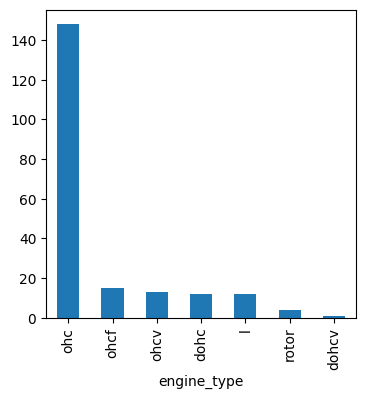

In [126]:
df["engine_type"].value_counts().plot(kind= "bar",figsize=(4,4))

conclusion: 
1. Maximum number of cars are with engine type is ohc.
2. Minimum number of cars are with engine type is dohcv.

<Axes: xlabel='engine_type', ylabel='count'>

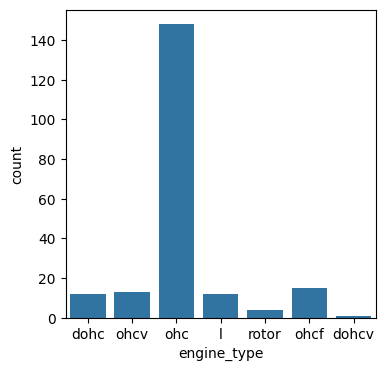

In [128]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="engine_type")

<Axes: ylabel='count'>

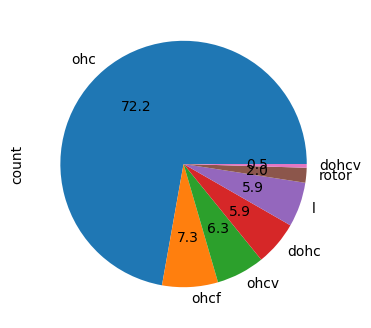

In [129]:
((df["engine_type"].value_counts()/len(df["engine_type"]))*100).plot(kind="pie",autopct="%1.1f",figsize=(4,4))

conclusion: 
1. Maximum number of cars are with engine type is ohc and the percentage is 72.2.
2. Minimum number of cars are with engine type is dohcv and the percentage is 0.5.

**For fuel_system**

<Axes: xlabel='fuel_system'>

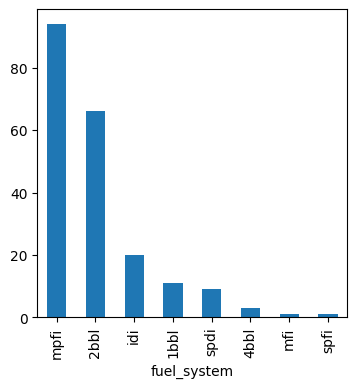

In [134]:
df["fuel_system"].value_counts().plot(kind= "bar",figsize=(4,4))

conclusion: 
1. Maximum number of cars are with fuel system is mpfi.
2. Minimum number of cars are with fuel system is spfi.

<Axes: xlabel='fuel_system', ylabel='count'>

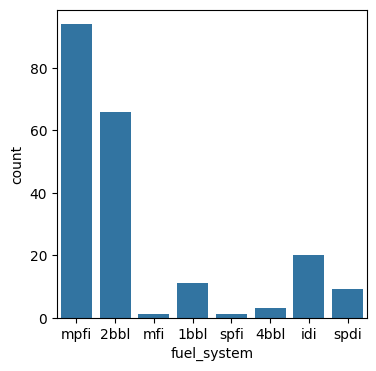

In [132]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="fuel_system")

<Axes: ylabel='count'>

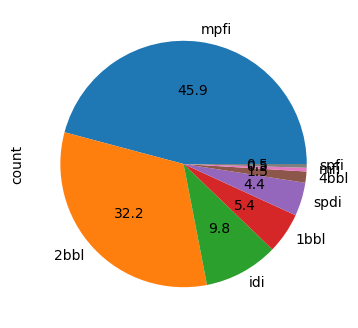

In [133]:
((df["fuel_system"].value_counts()/len(df["fuel_system"]))*100).plot(kind="pie",autopct="%1.1f",figsize=(4,4))

conclusion: 
1. Maximum number of cars are with fuel system is mpfi and the percentage is 45.9.
2. Minimum number of cars are with fuel system is spfi and the percentage is 0.5.

### Bi-variate Analysis

### 1. Categorical vs Categorical

* crosstab, countplot, stacked/Group bar chart

In [34]:
obj.columns

Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')

In [38]:
pd.crosstab(df["fuel_type"],df["aspiration"])

aspiration,std,turbo
fuel_type,,
diesel,7,13
gas,161,24


<Axes: xlabel='fuel_type', ylabel='count'>

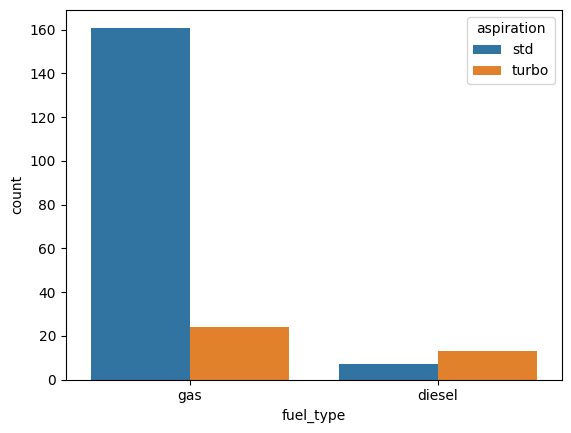

In [37]:
sns.countplot(data=df,x="fuel_type",hue="aspiration")

conclusion:
1. As per the countplot, gas fuel type is mostly used in std aspiration for 160 cars.
2. Gas fuel type is used in turbo aspiration for 24 cars.
3. Diesel is used in aspiration std for around 7 cars. 
4. Diesel is used in aspiration turbo for around 13 cars.

In [40]:
pd.crosstab(df["fuel_type"],df["body_style"])

body_style,convertible,hardtop,hatchback,sedan,wagon
fuel_type,,,,,
diesel,0,1,1,15,3
gas,6,7,69,81,22


<Axes: xlabel='fuel_type', ylabel='count'>

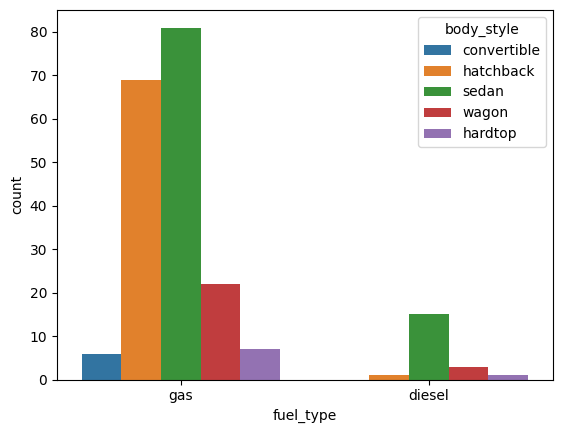

In [41]:
sns.countplot(data=df,x="fuel_type",hue="body_style")

conclusion:
1. around 80 sedan body style cars are run with gas fuel type.
2. around 70 hatchback body style cars are run with gas.
3. around 20 wagon body style cars are run with gas.
4. 7 hardtop body style cars are run with gas.
5. 15 sedan body style cars are run with diesel.

In [42]:
pd.crosstab(df["fuel_type"],df["drive_wheels"])

drive_wheels,4wd,fwd,rwd
fuel_type,,,
diesel,0,9,11
gas,9,111,65


<Axes: xlabel='fuel_type', ylabel='count'>

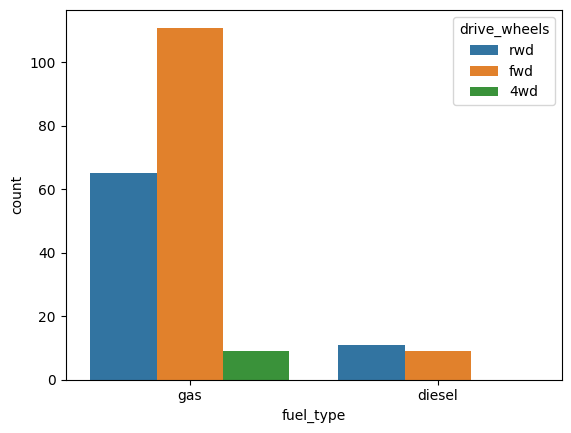

In [43]:
sns.countplot(data=df,x="fuel_type",hue="drive_wheels")

conclusion:
1. 111 cars with fwd drive wheels are runs with gas fuel type.
2. 65 cars with rwd drive wheels are runs with gas.
3. 9 cars with 4wd drive wheels are runs with gas.
4. 11 cars with rwd drive wheels are runs with diesel.
5. 9 cars with fwd drive wheels are runs with diesel.

In [44]:
pd.crosstab(df["fuel_type"],df['engine_location'])

engine_location,front,rear
fuel_type,,
diesel,20,0
gas,182,3


<Axes: xlabel='fuel_type', ylabel='count'>

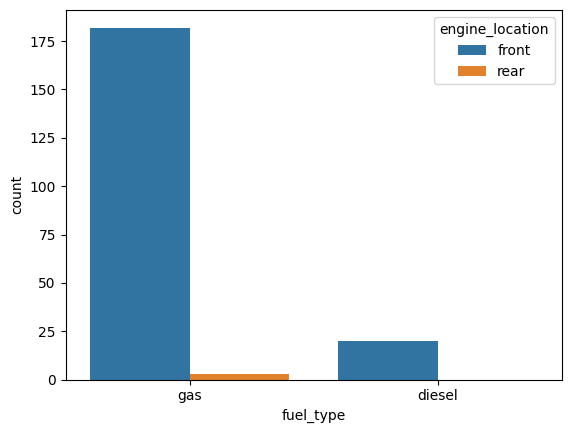

In [45]:
sns.countplot(data=df,x="fuel_type",hue='engine_location')

conclusion:
1. 182 cars with front engine location are runs with gas.
2. 3 cars with rear engine location are runs with gas.
3. 20 cars with front engine location runs with diesel.

In [46]:
pd.crosstab(df["fuel_type"],df['engine_type'])

engine_type,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
fuel_type,,,,,,,
diesel,0,0,5,15,0,0,0
gas,12,1,7,133,15,13,4


<Axes: xlabel='fuel_type', ylabel='count'>

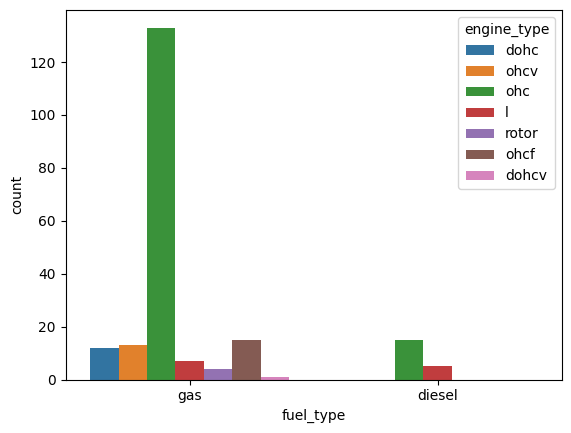

In [47]:
sns.countplot(data=df,x="fuel_type",hue='engine_type')

conclusion:
1. 133 cars with engine type ohc are run with gas fuel type.
2. one car with engine type dohcv are run with gas.
3. 15 cars with engine type ohc are run with diesel fuel type.
4. 5 cars with engine type I are run with diesel.

In [59]:
pd.crosstab(df["fuel_type"],df['fuel_system'])

fuel_system,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
fuel_type,,,,,,,,
diesel,0,0,0,20,0,0,0,0
gas,11,66,3,0,1,94,9,1


<Axes: xlabel='fuel_type', ylabel='count'>

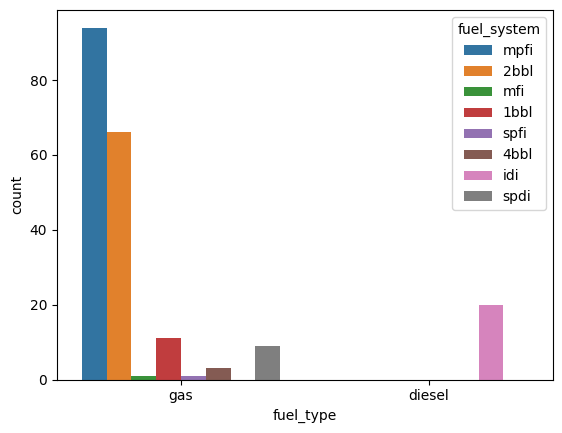

In [50]:
sns.countplot(data=df,x="fuel_type",hue='fuel_system')

conclusion:
1. 94 cars with mpfi fuel system are runs with gas.
2. one car with mfi and one car with spfi fuel system are runs with gas.
3. There are 20 cars with idi fuel system runs with diesel.

### 2. Categorical vs Numerical
* Bar chart,groupby,pivot table,Line chart.

In [83]:
df.groupby("fuel_type")['wheel_base'].mean()

fuel_type
diesel    104.390000
gas        98.142703
Name: wheel_base, dtype: float64

conclusion:
1. From above,fuel type is categorical variable and wheel base is numerical variable.
2. From the above data,the values are mean of wheel base values of diesel and gas cars.

### 3. Numerical vs Numerical
* correlation,scatter plot

In [91]:
num.columns

Index(['num_of_doors', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'num_of_cylinders', 'engine_size', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [92]:
df.corr(numeric_only=True)

,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
num_of_doors,1.000000,0.434334,0.385675,0.197735,0.540286,0.190720,-0.019503,0.017968,0.171797,-0.127846,-0.240473,-0.014271,-0.037452,0.024790
wheel_base,0.434334,1.000000,0.871674,0.795635,0.586421,0.775265,0.340349,0.567020,0.250870,0.351295,-0.364688,-0.467683,-0.541314,0.539638
length,0.385675,0.871674,1.000000,0.841118,0.491029,0.877728,0.430672,0.682920,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.656606
width,0.197735,0.795635,0.841118,1.000000,0.279210,0.867032,0.545007,0.733872,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.697848
height,0.540286,0.586421,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067997,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.137637
curb_weight,0.190720,0.775265,0.877728,0.867032,0.295572,1.000000,0.609727,0.847806,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.778676
num_of_cylinders,-0.019503,0.340349,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846195,-0.020002,0.691832,-0.124883,-0.445837,-0.466666,0.662178
engine_size,0.017968,0.567020,0.682920,0.733872,0.067997,0.847806,0.846195,1.000000,0.027709,0.808253,-0.244136,-0.651693,-0.674912,0.824425
compression_ratio,0.171797,0.250870,0.158414,0.181129,0.261214,0.151362,-0.020002,0.027709,1.000000,-0.204851,-0.436441,0.324701,0.265201,0.044760
horsepower,-0.127846,0.351295,0.553337,0.641337,-0.109286,0.750927,0.691832,0.808253,-0.204851,1.000000,0.130565,-0.802170,-0.770780,0.738565


conclusion:
1. correlation is used to find the relationship between the numerical features.As from the above, all values that are positive/negative describes the direction.
2. as strength is subjective in correlation,all the values between 0.8-1 describes the relashionship is strong.
3. the value 1 means, relationship is perfect,0.5-0.8 means moderate and below 0.5 means weak/no relationship.

<Axes: title={'center': 'Scatter plot'}, xlabel='price', ylabel='num_of_doors'>

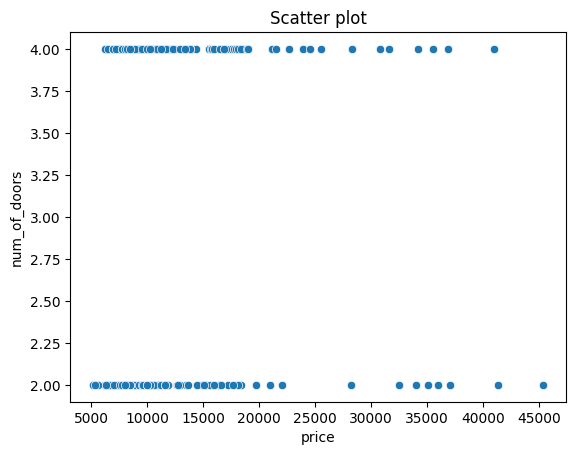

In [101]:
plt.title(label= "Scatter plot")
sns.scatterplot(data=df,x= "price",y="num_of_doors")

conclusion:
1. From the above scatterplot, the dots are not close to the regression line.
2. and the dots are not close to each other,so that we can say there is weak/no relationship

### Multi-Variate Analysis
* Heatmap,pair plot

<Axes: >

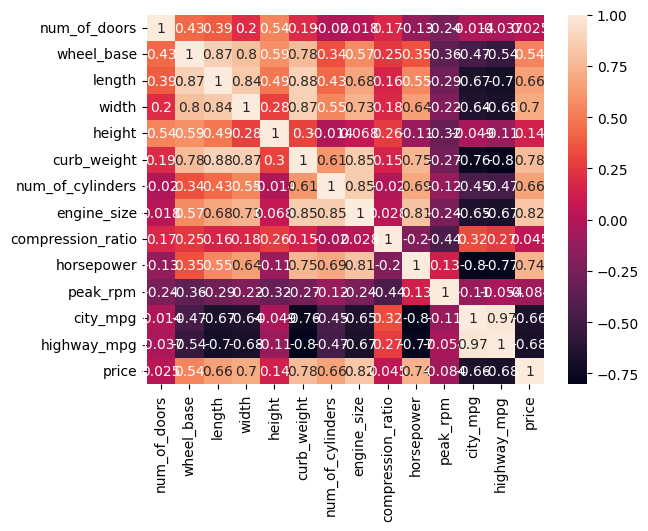

In [103]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

conclusion:
1. heatmap is used to find the relationship between the numerical features.As from the above, all values that are positive/negative describes the direction.
2. as strength is subjective in correlation,all the values between 0.8-1 describes the relashionship as strong.
3. if the value is 1,then relationship is perfect,0.5-0.8 means moderate and below 0.5 means weak/no relationship.
4. From the heatmap, the dark color always represents the weak relationship.
5. the light color represents the perfect relationship.

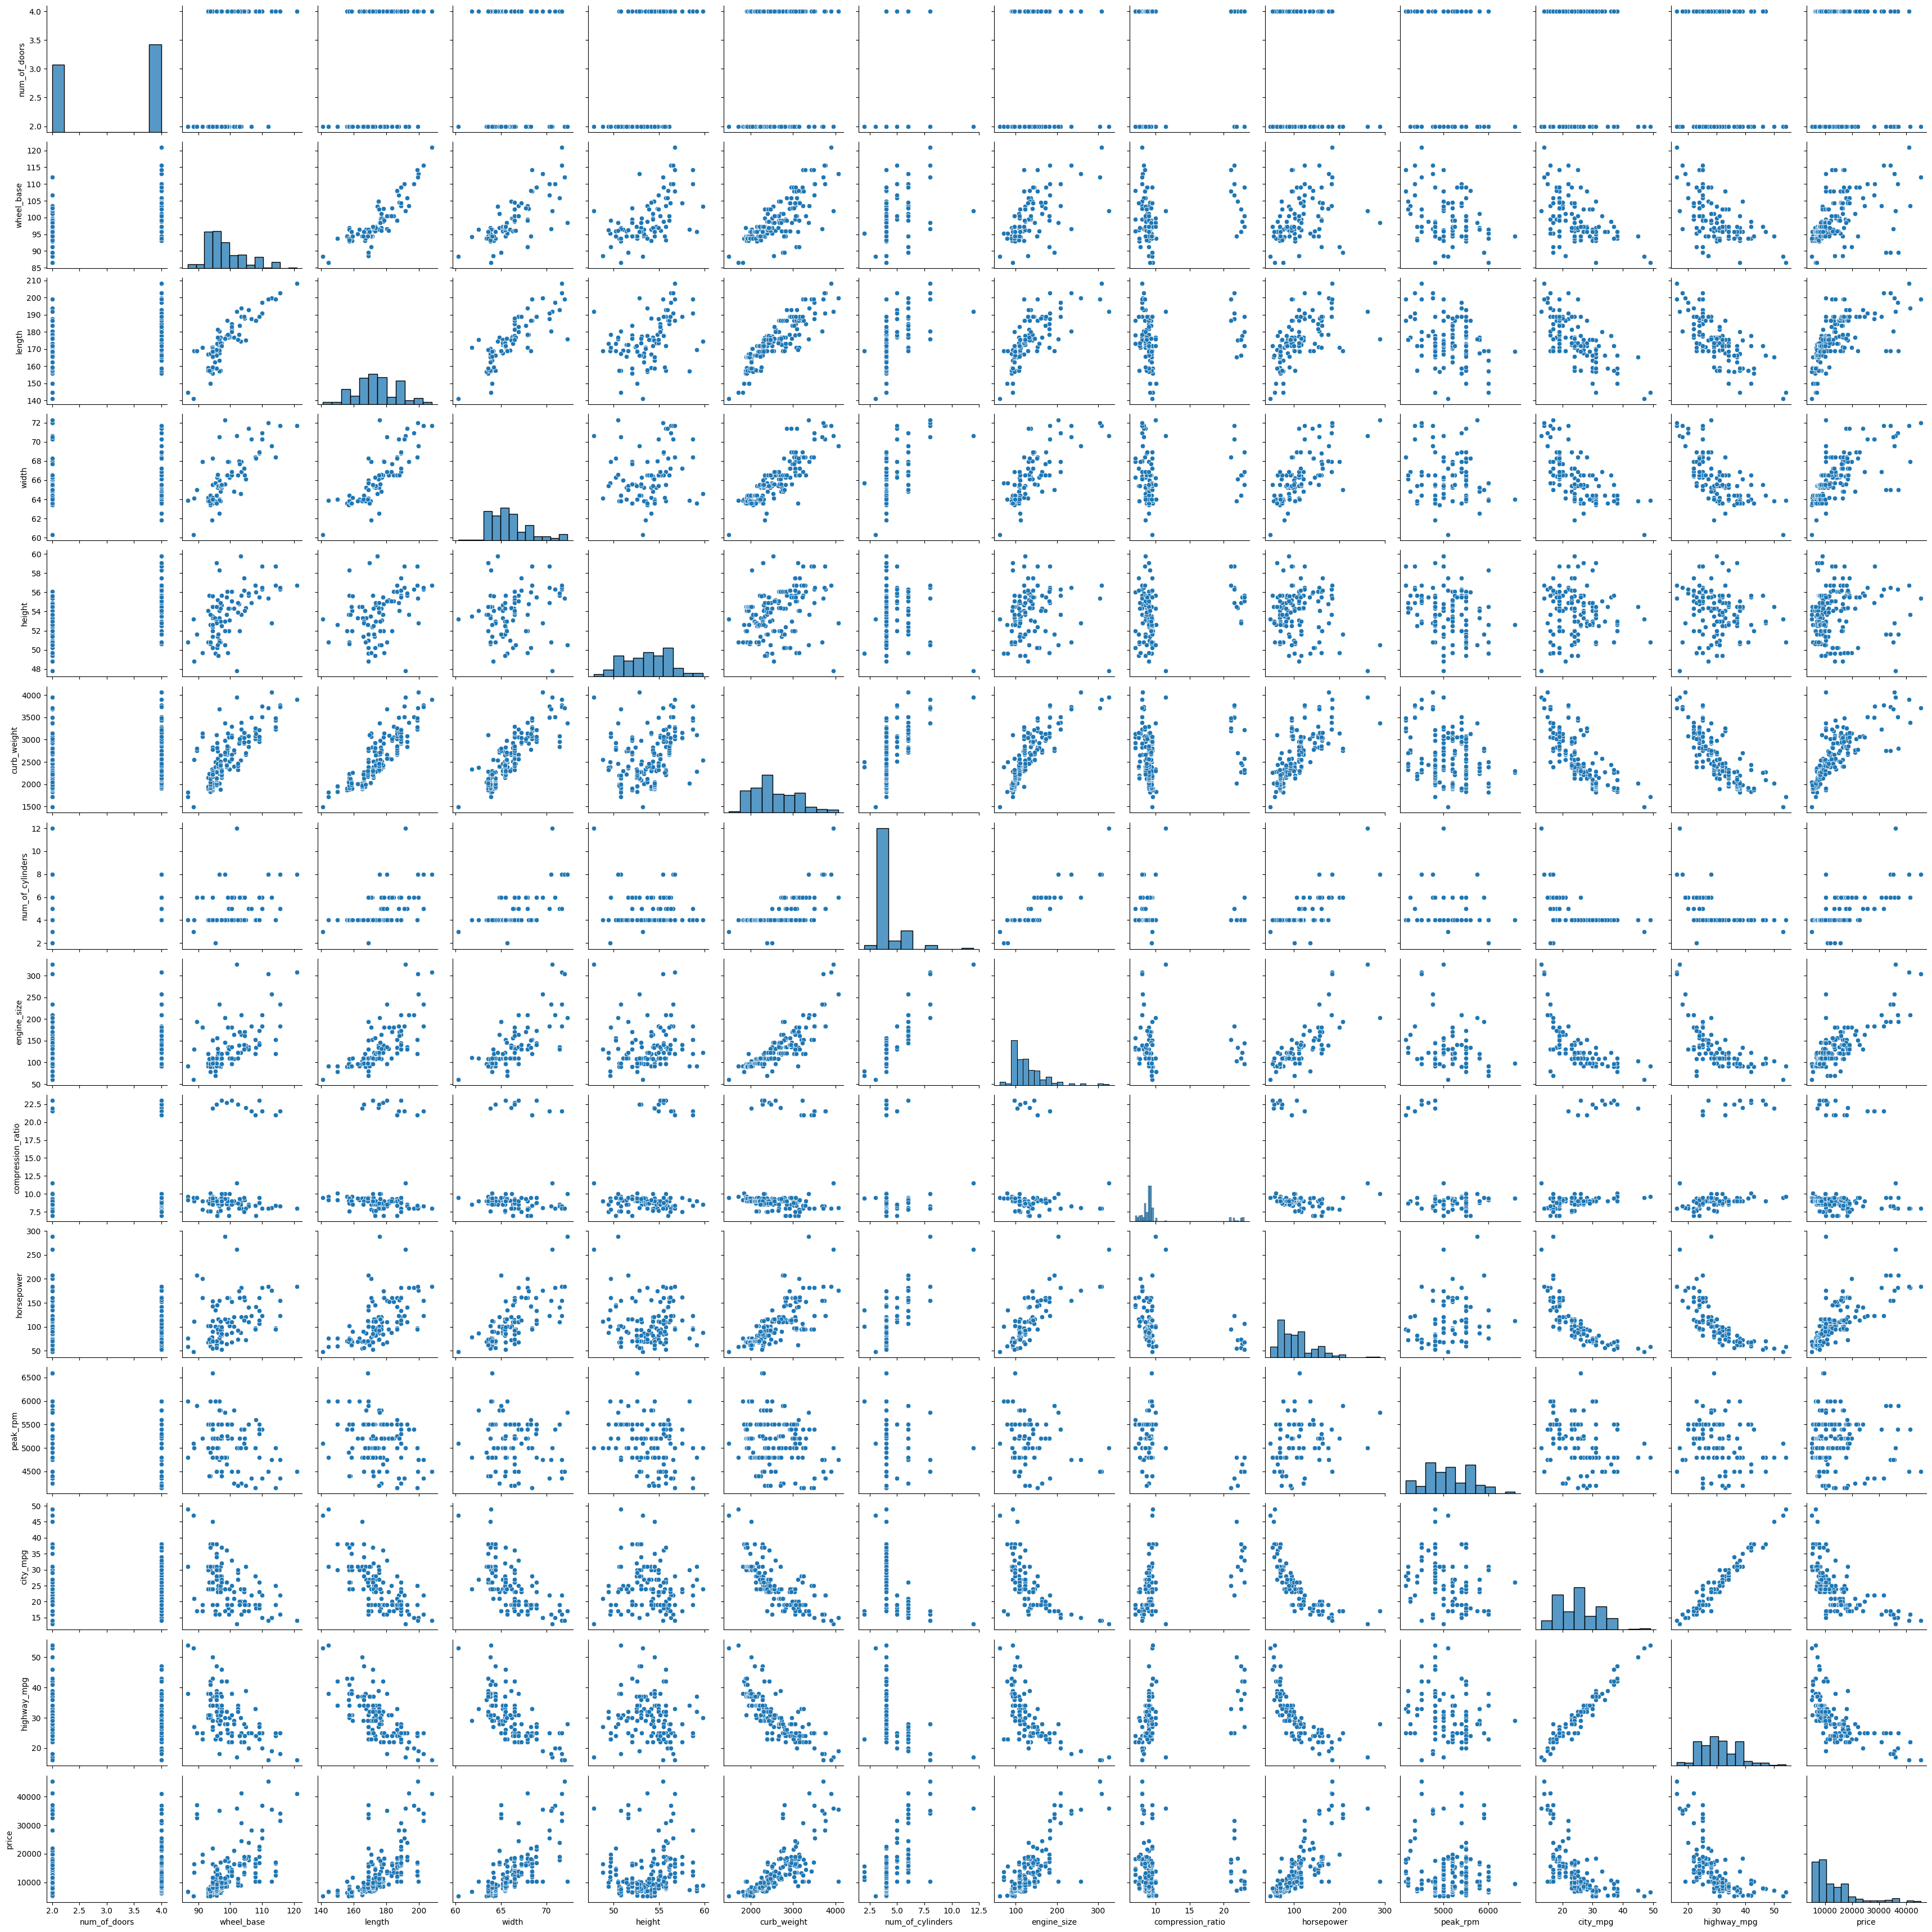

In [105]:
sns.pairplot(df)

conclusion:
* The pair plot is the combination of histogram and scatter plot of numeric features.
* To plot multiple pairwise bivariate distributions in a dataset.